# Questão 2

Considere os dados apresentados na tabela abaixo. Determine os centroides dos aglomerados "clusters" presentes nos dados, fazendo uso do  algoritmo  K-means. Para tanto considere os itens (a) - (c) referentes ao processo de inicialização. 

a) Considere que existam três clusters e a inicialização dos centros seja aleatória

b) Considere que existam três clusters e a inicialização dos centros seja dada por $m_1 = (1,1,1)^t$, $m_2=(-1,-1,-1)^t$, $m_3=(1,1,5)^t$. 

c) Compare  o  resultado  obtido  com  o  item  (a)  e  explique  a  razão  da  diferenças,  incluindo  o número de interações para alcançar a convergência.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(42)

data = pd.read_csv('data/dados_kmean.csv')
data.drop(columns=['Amostra'], inplace=True)
data.head()

,x1,x2,x3
0,7.82,-4.58,-3.97
1,-6.68,3.16,2.71
2,4.36,2.19,2.09
3,6.72,0.88,2.80
4,-8.64,-3.06,3.50


In [40]:
# Letra a)
X = data.to_numpy()

kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X)

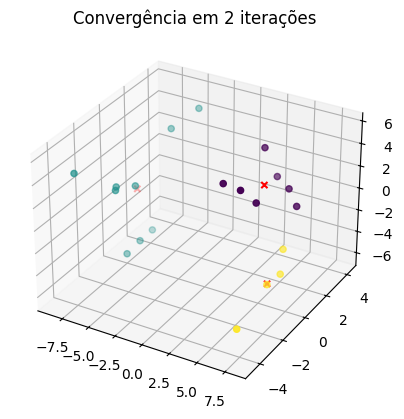

Clusters centers: [[ 5.80428571 -0.41        4.03285714]
 [-6.84111111  0.39333333 -0.45444444]
 [ 6.905      -1.1025     -3.735     ]]


In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_labels)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', c='red')
ax.set_title(f'Convergência em {kmeans.n_iter_} iterações')
plt.show()

print(f'Clusters centers: {kmeans.cluster_centers_}')

In [58]:
# Letra b)
clusters_init = np.array([
    [1, 1, 1],
    [-1, -1, -1],
    [1, 1, 5]
])

kmeans = KMeans(n_clusters=3, init=clusters_init)
kmeans_labels = kmeans.fit_predict(X)

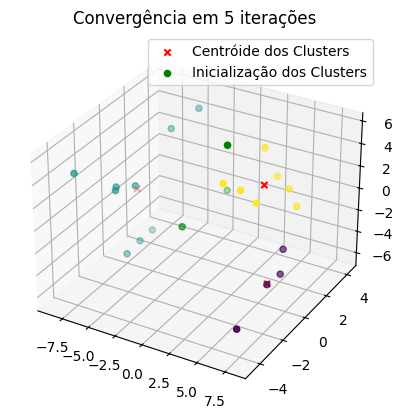

Clusters centers: [[ 6.905      -1.1025     -3.735     ]
 [-6.84111111  0.39333333 -0.45444444]
 [ 5.80428571 -0.41        4.03285714]]


In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_labels)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', c='red', label='Centróide dos Clusters')
ax.scatter(clusters_init[:, 0], clusters_init[:, 1], clusters_init[:, 2], marker='o', c='green', label='Inicialização dos Clusters')
ax.set_title(f'Convergência em {kmeans.n_iter_} iterações')
plt.legend()
plt.show()

print(f'Clusters centers: {kmeans.cluster_centers_}')